# **Kidney Disease Prediction By Diffrent Algorithm**

**Team Details**

Farjahan Akter Boby : 201014007

Md Asif Mostafa : 202014013

Mansuba Tabassum : 192014014

# Data Description

# Variable /Feature

1. Bp - blood pressure
2. Sg - specific gravity
3. Al - albumin
4. Su - sugar
5. Rbc - red blood cells
6. Bu - blood urea
7. Sc - serum creatinine
8. Sod - sodium
9. Pot - potassium
10. Hemo - hemoglobin
11. Wc -  white blood cell count
12. Rc -  red blood cell count
13. Htn - hypertension
14.HistorySmoking
15.HistoryDLD
16.HistoryObesity
17.CholesterolBaseline
18.CreatinineBaseline
19.eGFRBaseline
20.sBPBaseline
21.dBPBaseline
22. class - (0/1)







**Algorithm we have used**

1.Naive Bayes

2.KNN

3.Decision Tree

4.Random Forest

5.Gradient boosting Algorithm

6.Adaboost

7.XGboost

8.Extra Tree Classifier

9.LGBM Classifier

10.Stochastic Gradient boosting



In [ ]:
# importing all the necessary packages
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

In [ ]:
# Loading the data set
data=pd.read_csv('kidney.csv')

In [ ]:
data.head(23)

Bp     Sg  Al  Su  Rbc     Bu    Sc     Sod   Pot  Hemo  ...  Class  \
0    80  1.020   1   0    1   36.0   1.2  137.53  4.63  15.4  ...      1   
1    50  1.020   4   0    1   18.0   0.8  137.53  4.63  11.3  ...      1   
2    80  1.010   2   3    1   53.0   1.8  137.53  4.63   9.6  ...      1   
3    70  1.005   4   0    1   56.0   3.8  111.00  2.50  11.2  ...      1   
4    80  1.010   2   0    1   26.0   1.4  137.53  4.63  11.6  ...      1   
5    90  1.015   3   0    1   25.0   1.1  142.00  3.20  12.2  ...      1   
6    70  1.010   0   0    1   54.0  24.0  104.00  4.00  12.4  ...      1   
7    76  1.015   2   4    1   31.0   1.1  137.53  4.63  12.4  ...      1   
8   100  1.015   3   0    1   60.0   1.9  137.53  4.63  10.8  ...      1   
9    90  1.020   2   0    0  107.0   7.2  114.00  3.70   9.5  ...      1   
10   60  1.010   2   4    1   55.0   4.0  137.53  4.63   9.4  ...      1   
11   70  1.010   3   0    0   60.0   2.7  131.00  4.20  10.8  ...      1   
12   70  1.015   3   1    1   72.0   2.1  138.00  5.80   9.7  ...      1   
13   70  1.020   1   0    1   86.0   4.6  135.00  3.40   9.8  ...      1   
14   80  1.010   3   2    1   90.0   4.1  130.00  6.40   5.6  ...      1   
15   80  1.015   3   0    1  162.0   9.6  141.00  4.90   7.6  ...      1   
16   70  1.015   2   0    1   46.0   2.2  138.00  4.10  12.6  ...      1   
17   80  1.020   1   0    1   87.0   5.2  139.00  3.70  12.1  ...      1   
18  100  1.025   0   3    1   27.0   1.3  135.00  4.30  12.7  ...      1   
19   60  1.015   1   0    1   31.0   1.6  137.53  4.63  10.3  ...      1   
20   80  1.015   2   0    0  148.0   3.9  135.00  5.20   7.7  ...      1   
21   90  1.020   1   0    1  180.0  76.0    4.50  4.63  10.9  ...      1   
22   80  1.025   4   0    1  163.0   7.7  136.00  3.80   9.8  ...      1   

     age  HistorySmoking  HistoryDLD  HistoryObesity  CholesterolBaseline  \
0   48.0               1           1               1                  4.8   
1    7.0               1           1               1                  6.4   
2   62.0               1           1               1                  6.4   
3   48.0               1           1               1                  5.1   
4   51.0               1           1               1                  5.0   
5   60.0               1           1               1                  4.9   
6   68.0               1           1               1                  5.6   
7   24.0               1           1               1                  6.6   
8   52.0               1           1               1                  5.0   
9   53.0               1           1               1                  5.7   
10  50.0               1           1               1                  6.8   
11  63.0               2           1               0                  4.6   
12  68.0               1           0               1                  4.3   
13  68.0               1           1               0                  5.8   
14  68.0               1           1               0                  5.5   
15  40.0               1           1               0                  6.4   
16  47.0               1           0               1                  3.2   
17  47.0               1           1               0                  7.7   
18  60.0               1           1               0                  3.4   
19  62.0               1           1               1                  4.1   
20  61.0               1           1               1                  5.3   
21  60.0               1           1               1                  4.7   
22  48.0               1           0               1                  5.0   

    CreatinineBaseline  eGFRBaseline  sBPBaseline  dBPBaseline  
0                 59.0          93.3          144           87  
1                 52.0         105.8          148           91  
2                 57.0          99.8          149           86  
3                 65.0          90.3          116           68  
4     

In [ ]:
# Lets check the dimension of the data set
data.shape

(400, 23)

In [ ]:
data.tail()

Bp     Sg  Al  Su  Rbc    Bu   Sc    Sod  Pot  Hemo  ...  Class   age  \
395  80  1.020   0   0    1  49.0  0.5  150.0  4.9  15.7  ...      0  55.0   
396  70  1.025   0   0    1  31.0  1.2  141.0  3.5  16.5  ...      0  42.0   
397  80  1.020   0   0    1  26.0  0.6  137.0  4.4  15.8  ...      0  12.0   
398  60  1.025   0   0    1  50.0  1.0  135.0  4.9  14.2  ...      0  17.0   
399  80  1.025   0   0    1  18.0  1.1  141.0  3.5  15.8  ...      0  58.0   

     HistorySmoking  HistoryDLD  HistoryObesity  CholesterolBaseline  \
395               1           1               1                  5.1   
396               1           0               1                  5.4   
397               2           0               1                  4.0   
398               2           1               0                  6.6   
399               1           1               0                  5.4   

     CreatinineBaseline  eGFRBaseline  sBPBaseline  dBPBaseline  
395                57.0         109.9          130           84  
396                55.0          99.7          159           85  
397                71.0          97.0          105           60  
398                72.0         116.5          109           71  
399                92.0          74.4          117           60  

[5 rows x 23 columns]

In [ ]:
# Printing the first 5 records of the data set
data.head()

Bp     Sg  Al  Su  Rbc    Bu   Sc     Sod   Pot  Hemo  ...  Class   age  \
0  80  1.020   1   0    1  36.0  1.2  137.53  4.63  15.4  ...      1  48.0   
1  50  1.020   4   0    1  18.0  0.8  137.53  4.63  11.3  ...      1   7.0   
2  80  1.010   2   3    1  53.0  1.8  137.53  4.63   9.6  ...      1  62.0   
3  70  1.005   4   0    1  56.0  3.8  111.00  2.50  11.2  ...      1  48.0   
4  80  1.010   2   0    1  26.0  1.4  137.53  4.63  11.6  ...      1  51.0   

   HistorySmoking  HistoryDLD  HistoryObesity  CholesterolBaseline  \
0               1           1               1                  4.8   
1               1           1               1                  6.4   
2               1           1               1                  6.4   
3               1           1               1                  5.1   
4               1           1               1                  5.0   

   CreatinineBaseline  eGFRBaseline  sBPBaseline  dBPBaseline  
0                59.0          93.3          144           87  
1                52.0         105.8          148           91  
2                57.0          99.8          149           86  
3                65.0          90.3          116           68  
4                70.0          79.7          132           63  

[5 rows x 23 columns]

# Missing Value Detection and Treatment

1. Blank Value
2. Null
3. Null
4. Some continuous colums might have 0's indicate to missing data

In [ ]:
# Lets start by checking the count of records in each column of the data set.
# If the count of records is lesser than the total number of records i.e. 400, we can conclude that there
# are blank records.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bp                   400 non-null    int64  
 1   Sg                   400 non-null    float64
 2   Al                   400 non-null    int64  
 3   Su                   400 non-null    int64  
 4   Rbc                  400 non-null    int64  
 5   Bu                   400 non-null    float64
 6   Sc                   400 non-null    float64
 7   Sod                  400 non-null    float64
 8   Pot                  400 non-null    float64
 9   Hemo                 400 non-null    float64
 10  Wbcc                 400 non-null    int64  
 11  Rbcc                 400 non-null    float64
 12  Htn                  400 non-null    float64
 13  Class                400 non-null    int64  
 14  age                  391 non-null    float64
 15  HistorySmoking       400 non-null    int

In [ ]:
# Since all the predictor columns are continuous in nature, there might be a chance that 0's
#in these columns indicate missing data.

# Lets check the above claim.

data.describe()

Bp          Sg          Al          Su         Rbc         Bu  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000   
mean    76.455000    1.017712    1.015000    0.395000    0.882500   57.40550   
std     13.476536    0.005434    1.272329    1.040038    0.322418   49.28597   
min     50.000000    1.005000    0.000000    0.000000    0.000000    1.50000   
25%     70.000000    1.015000    0.000000    0.000000    1.000000   27.00000   
50%     78.000000    1.020000    1.000000    0.000000    1.000000   44.00000   
75%     80.000000    1.020000    2.000000    0.000000    1.000000   61.75000   
max    180.000000    1.025000    5.000000    5.000000    1.000000  391.00000   

              Sc         Sod         Pot        Hemo  ...       Class  \
count  400.00000  400.000000  400.000000  400.000000  ...  400.000000   
mean     3.07235  137.529025    4.627850   12.526900  ...    0.625000   
std      5.61749    9.204273    2.819783    2.716171  ...    0.484729   
min      0.40000    4.500000    2.500000    3.100000  ...    0.000000   
25%      0.90000  135.000000    4.000000   10.875000  ...    0.000000   
50%      1.40000  137.530000    4.630000   12.530000  ...    1.000000   
75%      3.07000  141.000000    4.800000   14.625000  ...    1.000000   
max     76.00000  163.000000   47.000000   17.800000  ...    1.000000   

              age  HistorySmoking  HistoryDLD  HistoryObesity  \
count  391.000000      400.000000  400.000000      400.000000   
mean    51.483376        1.112500    0.675000        0.532500   
std     17.169714        0.316376    0.468961        0.499567   
min      2.000000        1.000000    0.000000        0.000000   
25%     42.000000        1.000000    0.000000        0.000000   
50%     55.000000        1.000000    1.000000        1.000000   
75%     64.500000        1.000000    1.000000        1.000000   
max     90.000000        2.000000    1.000000        1.000000   

       CholesterolBaseline  CreatinineBaseline  eGFRBaseline  sBPBaseline  \
count           400.000000          400.000000    400.000000   400.000000   
mean              5.006300           65.323000     97.887500   131.635000   
std               1.110855           17.493025     18.033544    15.673574   
min               2.560000            6.000000     60.000000    95.000000   
25%               4.200000           53.000000     87.225000   121.000000   
50%               5.000000           63.500000     98.250000   131.000000   
75%               5.800000           76.000000    108.425000   141.000000   
max               9.300000          123.000000    242.600000   180.000000   

       dBPBaseline  
count   400.000000  
mean     76.857500  
std      10.600856  
min      45.000000  
25%      69.000000  
50%      77.000000  
75%      84.000000  
max     112.000000  

[8 rows x 23 columns]

In [ ]:
# Replacing the 0's with NaN.
# The records that have 0's in columns al,su,rbc,htn, Class, HistoryDLD,Historyobesity  will be replaced with NaN
from numpy import nan


data['Al']=data['Al'].replace(0,np.nan)
data['Su']=data['Su'].replace(0,np.nan)
data['Rbc']=data['Rbc'].replace(0,np.nan)
data['Htn']=data['Htn'].replace(0,np.nan)
data['class']=data['Class'].replace(0,np.nan)
data['HistoryDLD']=data['HistoryDLD'].replace(0,np.nan)
data['HistoryObesity']=data['HistoryObesity'].replace(0,np.nan)

In [ ]:
#Lets check if the above code has worked
data.head()
# All the 0's have been replaced by NaN

Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo  ...   age  \
0  80  1.020  1.0  NaN  1.0  36.0  1.2  137.53  4.63  15.4  ...  48.0   
1  50  1.020  4.0  NaN  1.0  18.0  0.8  137.53  4.63  11.3  ...   7.0   
2  80  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  ...  62.0   
3  70  1.005  4.0  NaN  1.0  56.0  3.8  111.00  2.50  11.2  ...  48.0   
4  80  1.010  2.0  NaN  1.0  26.0  1.4  137.53  4.63  11.6  ...  51.0   

   HistorySmoking  HistoryDLD  HistoryObesity  CholesterolBaseline  \
0               1         1.0             1.0                  4.8   
1               1         1.0             1.0                  6.4   
2               1         1.0             1.0                  6.4   
3               1         1.0             1.0                  5.1   
4               1         1.0             1.0                  5.0   

   CreatinineBaseline  eGFRBaseline  sBPBaseline  dBPBaseline  class  
0                59.0          93.3          144           87    1.0  
1                52.0         105.8          148           91    1.0  
2                57.0          99.8          149           86    1.0  
3                65.0          90.3          116           68    1.0  
4                70.0          79.7          132           63    1.0  

[5 rows x 24 columns]

In [ ]:
# Count of NaN values in the dataset
print(data.isnull().sum())

Bp                       0
Sg                       0
Al                     199
Su                     339
Rbc                     47
Bu                       0
Sc                       0
Sod                      0
Pot                      0
Hemo                     0
Wbcc                     0
Rbcc                     0
Htn                    251
Class                    0
age                      9
HistorySmoking           0
HistoryDLD             130
HistoryObesity         187
CholesterolBaseline      0
CreatinineBaseline       0
eGFRBaseline             0
sBPBaseline              0
dBPBaseline              0
class                  150
dtype: int64


In [ ]:
data.median()

Bp                       78.00
Sg                        1.02
Al                        2.00
Su                        2.00
Rbc                       1.00
Bu                       44.00
Sc                        1.40
Sod                     137.53
Pot                       4.63
Hemo                     12.53
Wbcc                   8406.00
Rbcc                      4.71
Htn                       1.00
Class                     1.00
age                      55.00
HistorySmoking            1.00
HistoryDLD                1.00
HistoryObesity            1.00
CholesterolBaseline       5.00
CreatinineBaseline       63.50
eGFRBaseline             98.25
sBPBaseline             131.00
dBPBaseline              77.00
class                     1.00
dtype: float64

In [ ]:
# Replacing missing values with their respective columns median
data.fillna(data.median(), inplace=True)

In [ ]:
# Checking if the missing values have been imputed
print(data.isnull().sum())

Bp                     0
Sg                     0
Al                     0
Su                     0
Rbc                    0
Bu                     0
Sc                     0
Sod                    0
Pot                    0
Hemo                   0
Wbcc                   0
Rbcc                   0
Htn                    0
Class                  0
age                    0
HistorySmoking         0
HistoryDLD             0
HistoryObesity         0
CholesterolBaseline    0
CreatinineBaseline     0
eGFRBaseline           0
sBPBaseline            0
dBPBaseline            0
class                  0
dtype: int64


In [ ]:
# The distribution of the class variable was examined.
data["Class"].value_counts()*100/len(data)

1    62.5
0    37.5
Name: Class, dtype: float64

In [ ]:
# The classes of the outcome variable were examined.
data.Class.value_counts()

1    250
0    150
Name: Class, dtype: int64

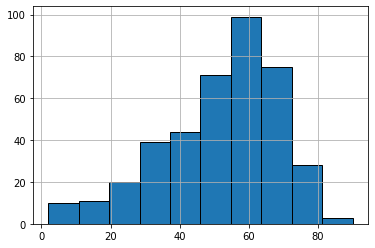

In [ ]:
# The histagram of the Age variable was reached.
data["age"].hist(edgecolor = "black");

In [ ]:
print("Max Age: " + str(data["age"].max()) + " Min Age: " + str(data["age"].min()))

Max Age: 90.0 Min Age: 2.0


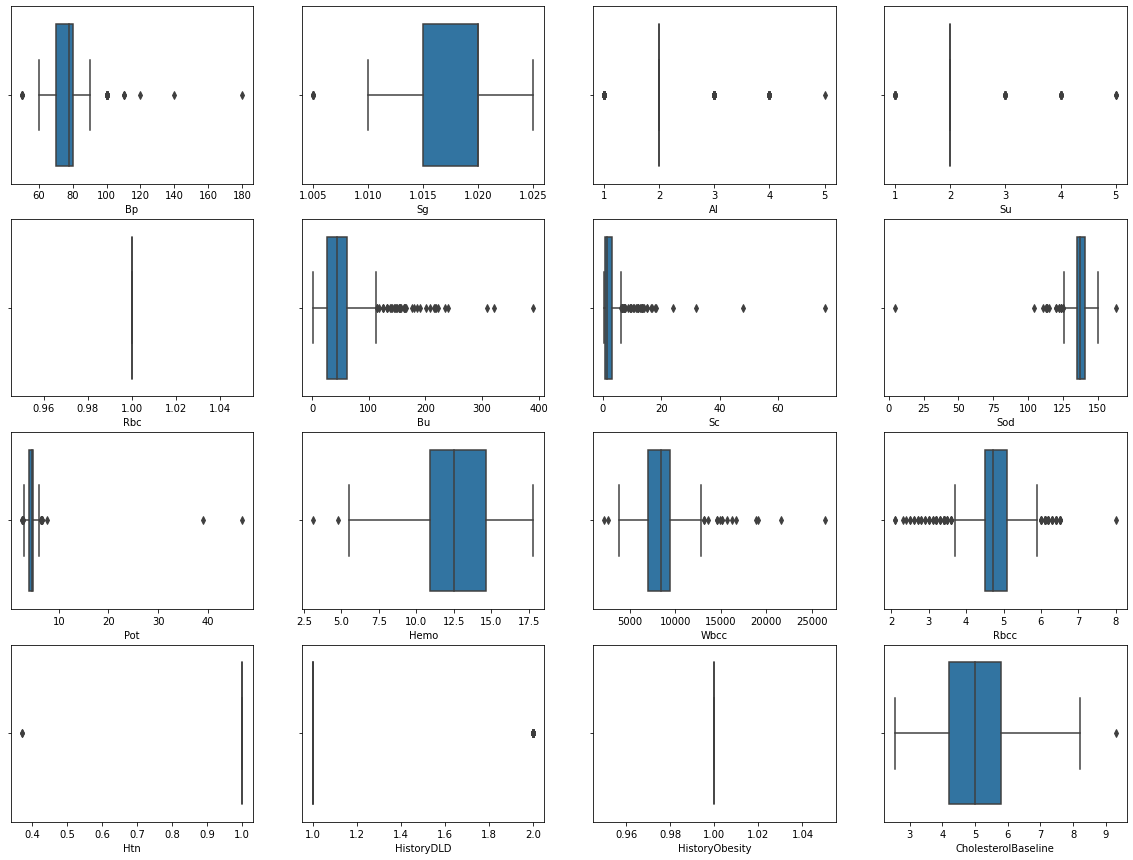

In [ ]:
# Outlier detection using boxplots
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Bp'])

plt.subplot(4,4,2)
sns.boxplot(data['Sg'])

plt.subplot(4,4,3)
sns.boxplot(data['Al'])

plt.subplot(4,4,4)
sns.boxplot(data['Su'])

plt.subplot(4,4,5)
sns.boxplot(data['Rbc'])

plt.subplot(4,4,6)
sns.boxplot(data['Bu'])

plt.subplot(4,4,7)
sns.boxplot(data['Sc'])

plt.subplot(4,4,8)
sns.boxplot(data['Sod'])

plt.subplot(4,4,9)
sns.boxplot(data['Pot'])

plt.subplot(4,4,10)
sns.boxplot(data['Hemo'])

plt.subplot(4,4,11)
sns.boxplot(data['Wbcc'])

plt.subplot(4,4,12)
sns.boxplot(data['Rbcc'])

plt.subplot(4,4,13)
sns.boxplot(data['Htn'])

plt.subplot(4,4,14)
sns.boxplot(data['HistorySmoking'])

plt.subplot(4,4,14)
sns.boxplot(data['HistoryDLD'])

plt.subplot(4,4,15)
sns.boxplot(data['HistoryObesity'])

plt.subplot(4,4,16)
sns.boxplot(data['CholesterolBaseline'])






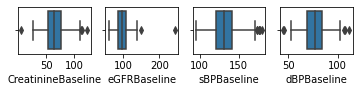

In [ ]:

plt.subplot(4,4,5)
sns.boxplot(data['CreatinineBaseline'])

plt.subplot(4,4,6)
sns.boxplot(data['eGFRBaseline'])

plt.subplot(4,4,7)
sns.boxplot(data['sBPBaseline'])

plt.subplot(4,4,8)
sns.boxplot(data['dBPBaseline'])



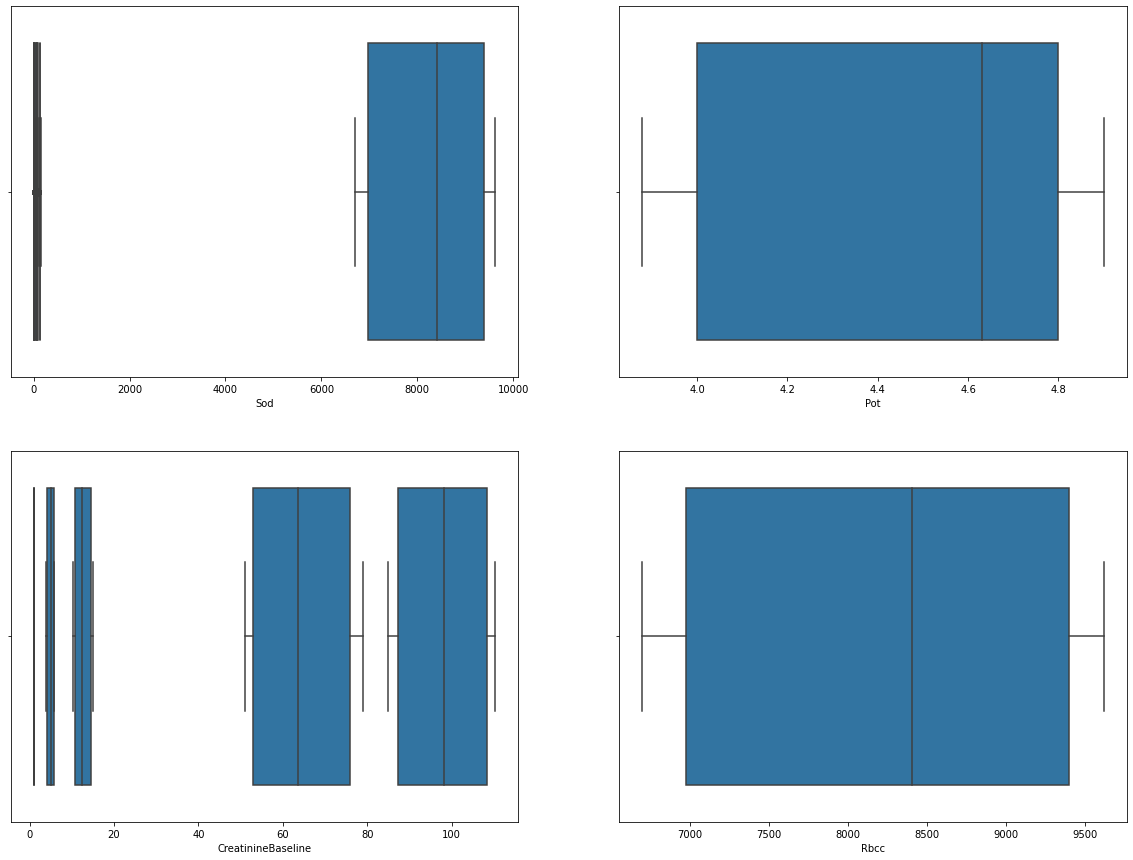

In [ ]:
# As we can see, there are still outliers in columns Bp, Al , Su , Bu ,Sc,Sg,Rbcc,Sod,Pot,Hemo,Htn,HistoryDLD,eGFRBaseline,CholesterolBaseline,CreatinineBaseline
#Lets try manipulating the percentile values.

data['Bp']=data['Bp'].clip(lower=data['Bp'].quantile(0.07), upper=data['Bp'].quantile(0.93))
data['Al']=data['Al'].clip(lower=data['Al'].quantile(0.21), upper=data['Al'].quantile(0.80))
data['Su']=data['Su'].clip(lower=data['Su'].quantile(0.07), upper=data['Bp'].quantile(0.93))
data['Bu']=data['Bu'].clip(lower=data['Bu'].quantile(0.21), upper=data['Bu'].quantile(0.80))
data['Sc']=data['Sc'].clip(lower=data['Sc'].quantile(0.07), upper=data['Sc'].quantile(0.93))
data['Rbcc']=data['Rbcc'].clip(lower=data['Rbcc'].quantile(0.21), upper=data['Rbcc'].quantile(0.80))
data['Sg']=data['Sg'].clip(lower=data['Sg'].quantile(0.21), upper=data['Sg'].quantile(0.80))
data['Rbcc']=data['Rbcc'].clip(lower=data['Rbcc'].quantile(0.21), upper=data['Rbcc'].quantile(0.80))
data['Sod']=data['Sod'].clip(lower=data['Sod'].quantile(0.21), upper=data['Sod'].quantile(0.80))
data['Pot']=data['Pot'].clip(lower=data['Pot'].quantile(0.21), upper=data['Pot'].quantile(0.80))
data['Hemo']=data['Hemo'].clip(lower=data['Hemo'].quantile(0.21), upper=data['Hemo'].quantile(0.80))
data['Rbcc']=data['Wbcc'].clip(lower=data['Wbcc'].quantile(0.21), upper=data['Wbcc'].quantile(0.80))
data['Htn']=data['Htn'].clip(lower=data['Htn'].quantile(0.21), upper=data['Htn'].quantile(0.80))
data['HistoryDLD']=data['HistoryDLD'].clip(lower=data['HistoryDLD'].quantile(0.21), upper=data['HistoryDLD'].quantile(0.80))
data['CholesterolBaseline']=data['CholesterolBaseline'].clip(lower=data['CholesterolBaseline'].quantile(0.21), upper=data['CholesterolBaseline'].quantile(0.80))
data['eGFRBaseline']=data['eGFRBaseline'].clip(lower=data['eGFRBaseline'].quantile(0.21), upper=data['eGFRBaseline'].quantile(0.80))
data['CholesterolBaseline']=data['CholesterolBaseline'].clip(lower=data['CholesterolBaseline'].quantile(0.21), upper=data['CholesterolBaseline'].quantile(0.80))
data['CreatinineBaseline']=data['CreatinineBaseline'].clip(lower=data['CreatinineBaseline'].quantile(0.21), upper=data['CreatinineBaseline'].quantile(0.80))


plt.figure(figsize= (20,15))

plt.subplot(2,2,1)
sns.boxplot(data['Bp'])

plt.subplot(2,2,1)
sns.boxplot(data['Al'])

plt.subplot(2,2,1)
sns.boxplot(data['Su'])

plt.subplot(2,2,1)
sns.boxplot(data['Bu'])

plt.subplot(2,2,1)
sns.boxplot(data['Sc'])

plt.subplot(2,2,1)
sns.boxplot(data['Sg'])

plt.subplot(2,2,1)
sns.boxplot(data['Rbcc'])

plt.subplot(2,2,1)
sns.boxplot(data['Sod'])

plt.subplot(2,2,2)
sns.boxplot(data['Pot'])

plt.subplot(2,2,3)
sns.boxplot(data['Hemo'])

plt.subplot(2,2,4)
sns.boxplot(data['Rbcc'])

plt.subplot(2,2,3)
sns.boxplot(data['Htn'])

plt.subplot(2,2,3)
sns.boxplot(data['HistoryDLD'])

plt.subplot(2,2,3)
sns.boxplot(data['eGFRBaseline'])

plt.subplot(2,2,3)
sns.boxplot(data['CholesterolBaseline'])

plt.subplot(2,2,3)
sns.boxplot(data['CreatinineBaseline'])






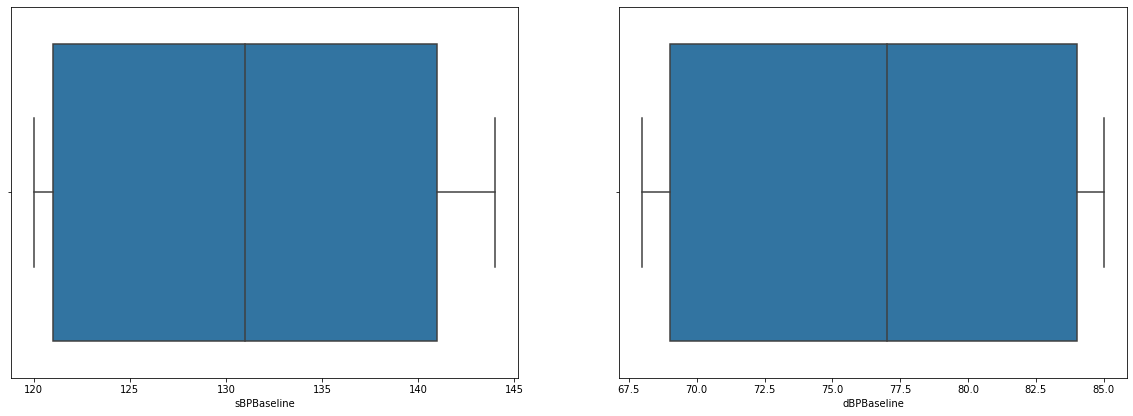

In [ ]:
data['sBPBaseline']=data['sBPBaseline'].clip(lower=data['sBPBaseline'].quantile(0.21), upper=data['sBPBaseline'].quantile(0.80))
data['dBPBaseline']=data['dBPBaseline'].clip(lower=data['dBPBaseline'].quantile(0.21), upper=data['dBPBaseline'].quantile(0.80))


plt.figure(figsize= (20,15))

plt.subplot(2,2,1)
sns.boxplot(data['sBPBaseline'])


plt.subplot(2,2,2)
sns.boxplot(data['dBPBaseline'])

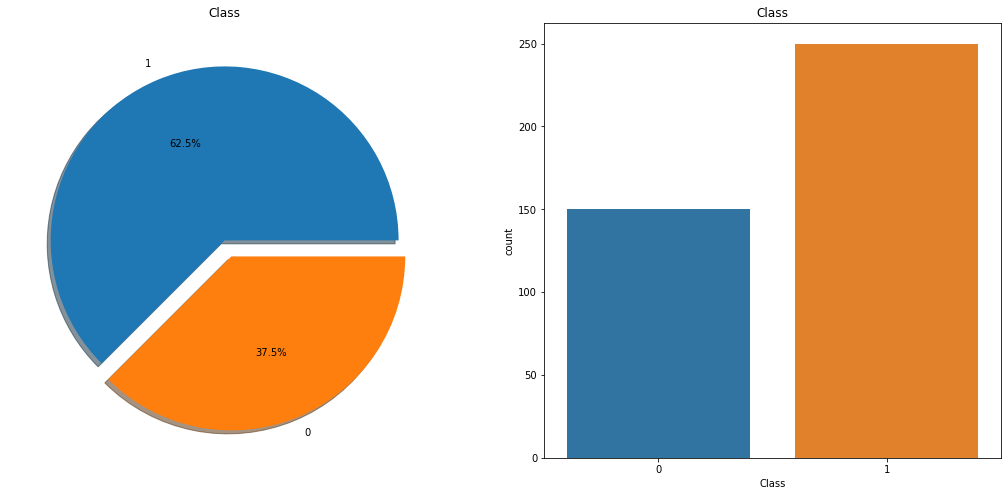

In [ ]:
# The distribution of the Class variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Class')
ax[0].set_ylabel('')
sns.countplot('Class',data=data,ax=ax[1])
ax[1].set_title('Class')
plt.show()

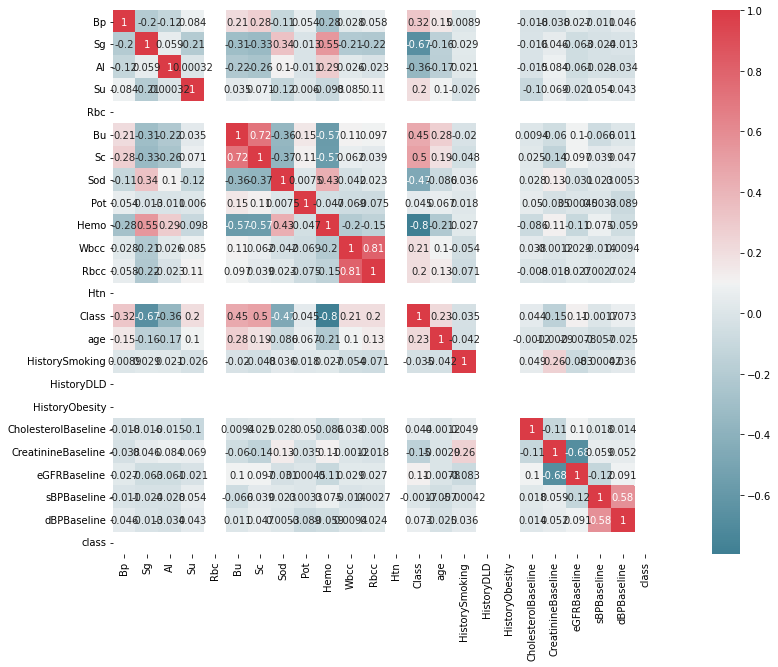

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

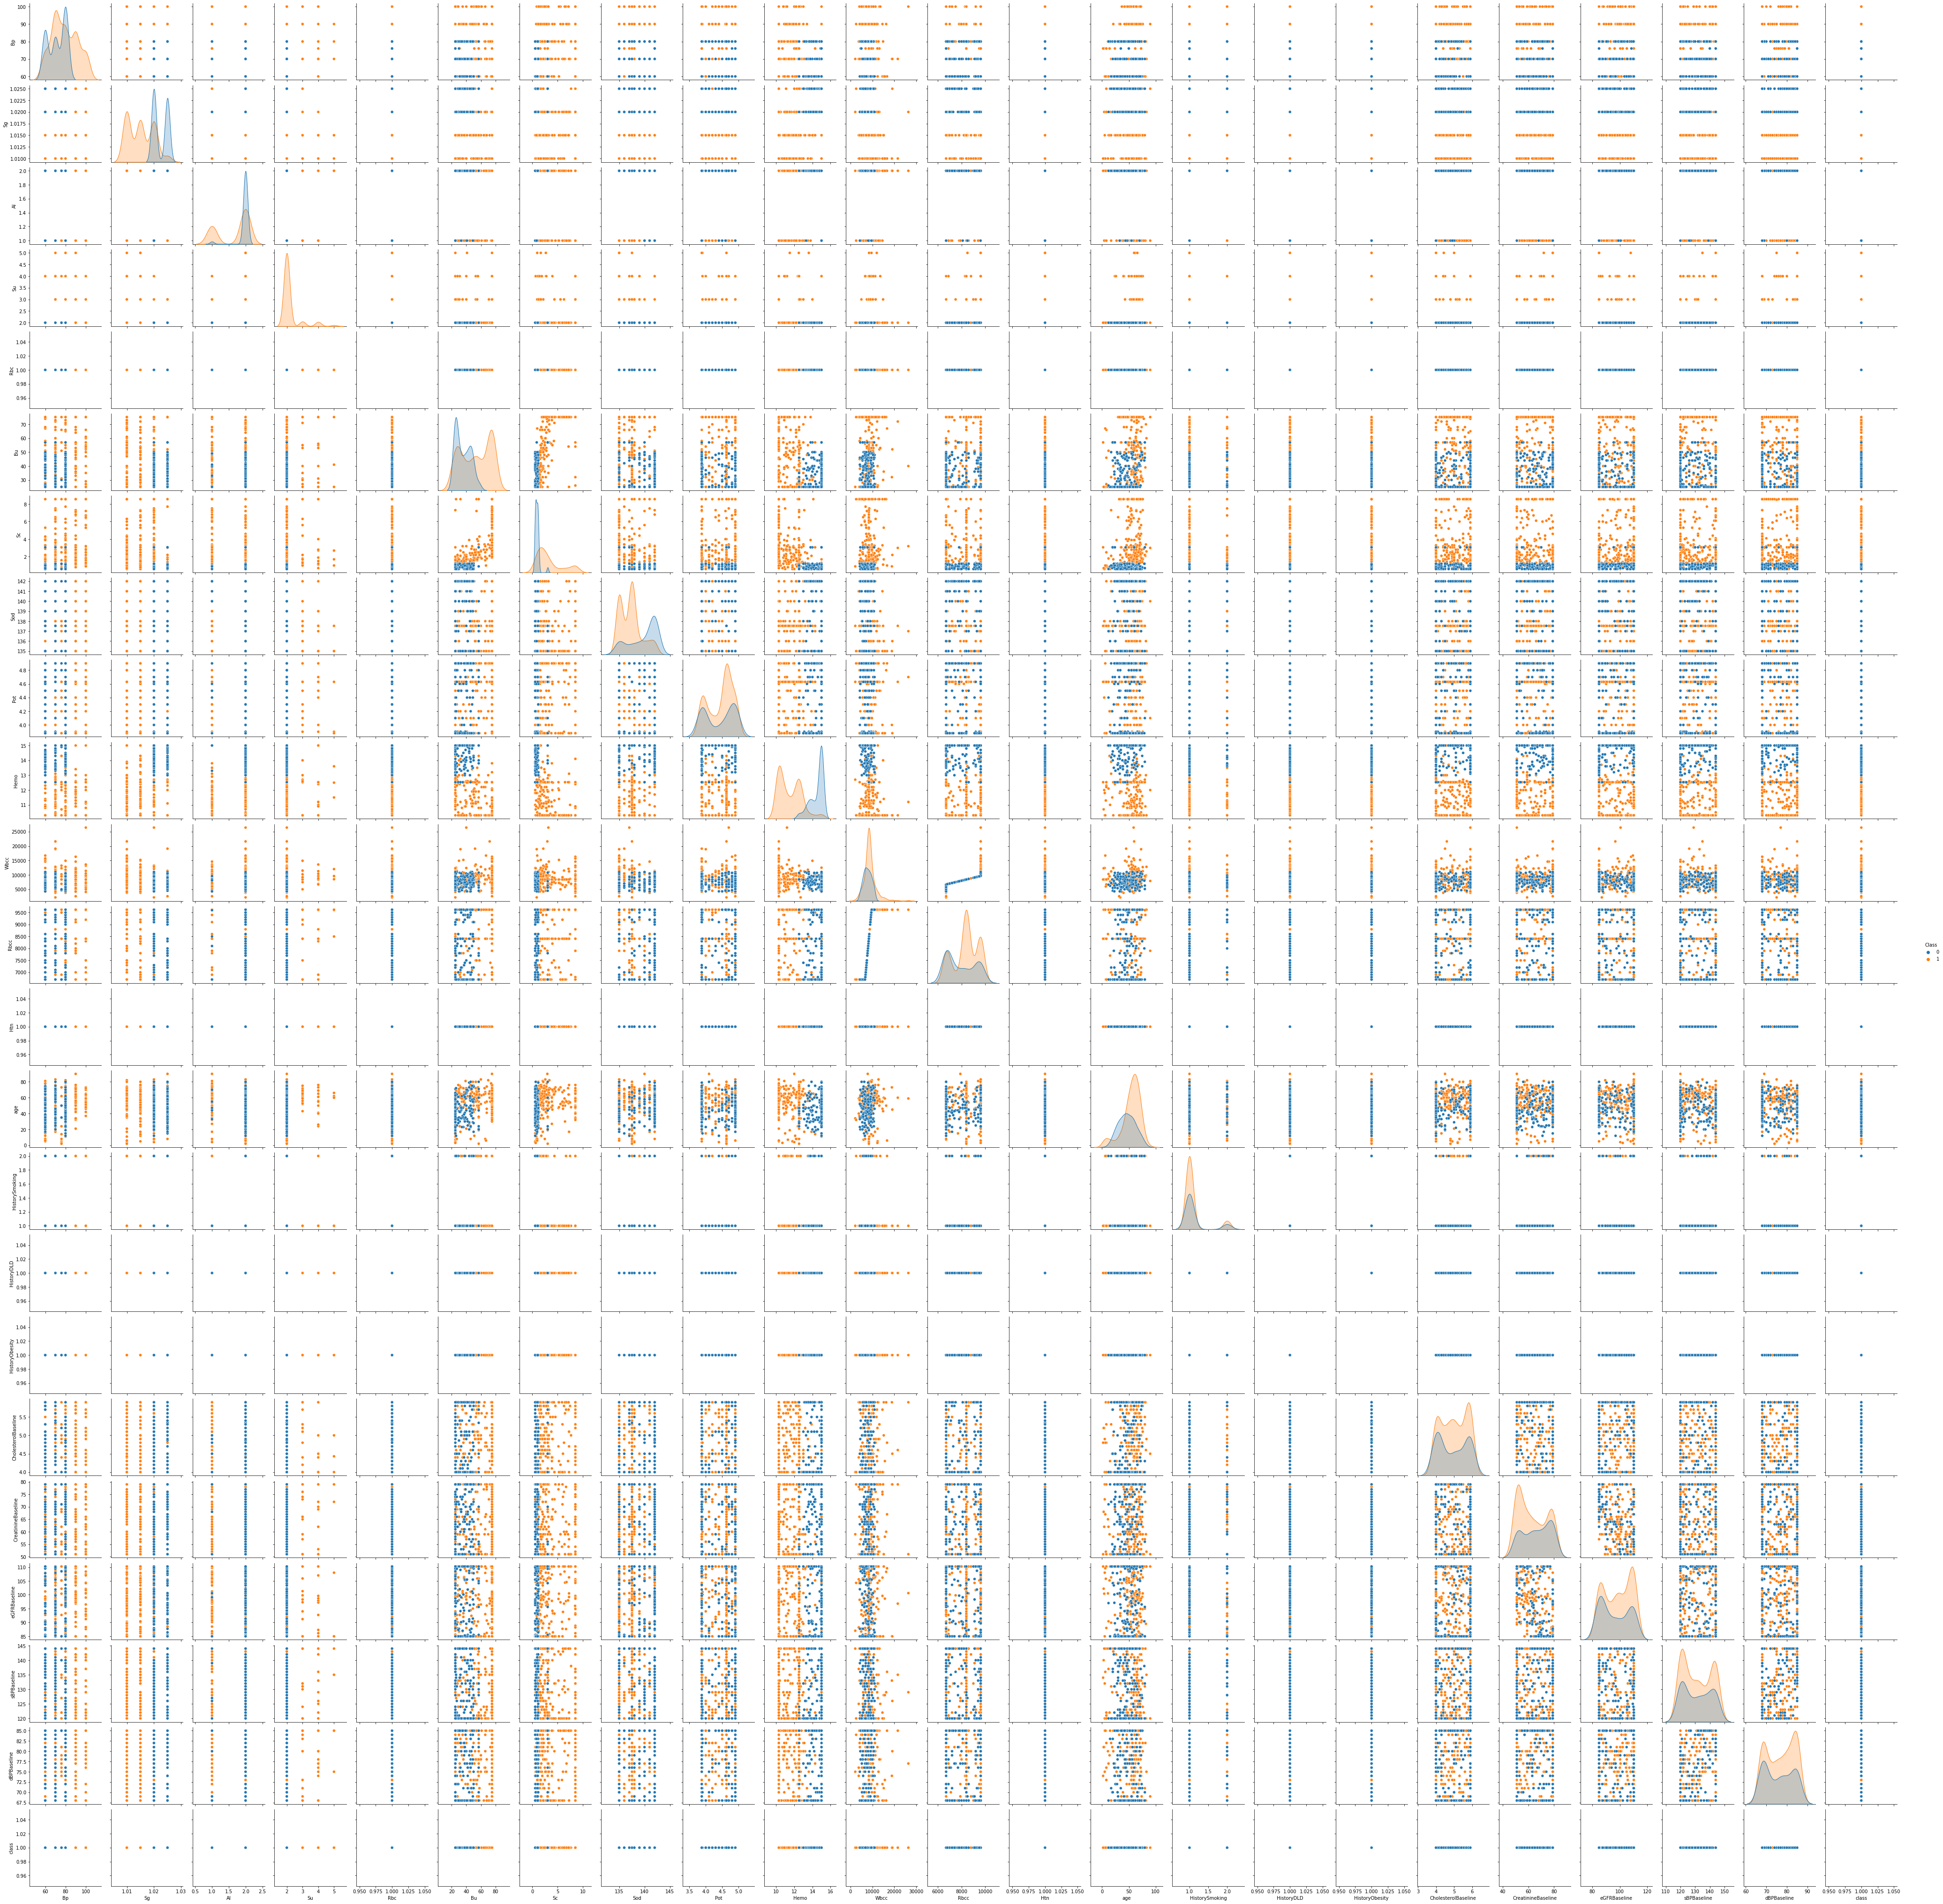

In [ ]:
# Pair plot analysis
sns.pairplot(data,hue='Class',diag_kind='kde')

# **DATA MODELLING AND TRAINNING**

#1. **NAIVE** **BAYES**

In [ ]:
data.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class', 'age', 'HistorySmoking', 'HistoryDLD',
       'HistoryObesity', 'CholesterolBaseline', 'CreatinineBaseline',
       'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'class'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x= data.drop(['Class'],axis =1)
y=data['Class']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
model.fit(xTrain,yTrain)

GaussianNB()

In [ ]:
predicted= model.predict(xTest)
accuracy= model.score(xTest,yTest)
from sklearn import metrics
cm = metrics.confusion_matrix(yTest, predicted)
print(cm)

[[24  4]
 [ 5 47]]


In [ ]:
print("Predicted Value:", predicted)

Predicted Value: [1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 0 0 0]


In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, predicted))

Accuracy: 0.8875


In [ ]:
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  88.75 %


##2. **LGBM** **CLASSIFIER**


In [ ]:
ind_col = [col for col in data.columns if col != 'Class']
dep_col = 'Class'

X = data[ind_col]
y = data[dep_col]

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.9666666666666667 

[[45  3]
 [ 1 71]]

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.99      0.97        72

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
print('Accuracy score of the  LGBMClassifier: ', lgbm_acc*100,'%')

Accuracy score of the  LGBMClassifier:  96.66666666666667 %


# 3.**Stochastic** **Gradient** **Boosting** (**SGB**)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9833333333333333 

Confusion Matrix :- 
[[46  2]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        72

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
print('Accuracy score of the  Stochastic Gradient Boosting : ', sgb_acc*100,'%')

Accuracy score of the  Stochastic Gradient Boosting :  98.33333333333333 %


## 4.**XgBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 
[[46  2]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        72

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
print('Accuracy score of the  XgBoost: ', xgb_acc*100,'%')

Accuracy score of the  XgBoost:  98.33333333333333 %


# 5.**Extraa** **Tress**  **Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.975 

Confusion Matrix :- 
[[45  3]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        72

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
print('Accuracy score of the  Extra Trees Classifier: ', etc_acc*100,'%')

Accuracy score of the  Extra Trees Classifier:  97.5 %


##6. **Gradient** **Boosting** **Classifier**



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[45  3]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        72

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
print('Accuracy score of the  GradientBoostingClassifier: ', gb_acc*100,'%')

Accuracy score of the  GradientBoostingClassifier:  97.5 %


##7. **Ada** **Boost** **Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.925 

Confusion Matrix :- 
[[40  8]
 [ 1 71]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90        48
           1       0.90      0.99      0.94        72

    accuracy                           0.93       120
   macro avg       0.94      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120



In [ ]:
print('Accuracy score of the  Ada Boost Classifier: ', ada_acc*100,'%')

Accuracy score of the  Ada Boost Classifier:  92.5 %


## 8.**knn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7714285714285715
Test Accuracy of KNN is 0.6916666666666667 

Confusion Matrix :- 
[[30 18]
 [19 53]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.61      0.62      0.62        48
           1       0.75      0.74      0.74        72

    accuracy                           0.69       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.69      0.69      0.69       120



In [ ]:
print('Accuracy score of the  knn: ', knn_acc*100,'%')

Accuracy score of the  knn:  69.16666666666667 %


## 9.**Decision** **Tree** **Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[43  5]
 [ 1 71]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.93      0.99      0.96        72

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



In [ ]:
print('Accuracy score of the  decision tree classifier: ', dtc_acc*100,'%')

Accuracy score of the  decision tree classifier:  95.0 %


#10. **Random** **Forest** **Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[46  2]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        72

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
print('Accuracy score of the  decision tree classifier: ', rd_clf_acc*100,'%')

Accuracy score of the  decision tree classifier:  98.33333333333333 %


## **Models** **Comparison**

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'NAIVE BAYES', 'LGBM CLASSIFIER', 'STOCHASTING GRADIENT BOOSTING(SGB)','XGBOOST',
             'EXTRAA TREES CLASSIFIER', 'GRADIENT BOOSTING CLASSIFIER', 'ADA BOOST CLASSIFIER', 'KNN', 'DECISION TREE CLASSIFIER','RANDOM FOREST CLASSIFIER'],
    'Score' : [accuracy, lgbm_acc, sgb_acc, xgb_acc, etc_acc, gb_acc, ada_acc, knn_acc, dtc_acc,rd_clf_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2  STOCHASTING GRADIENT BOOSTING(SGB)  0.983333
3                             XGBOOST  0.983333
9            RANDOM FOREST CLASSIFIER  0.983333
4             EXTRAA TREES CLASSIFIER  0.975000
5        GRADIENT BOOSTING CLASSIFIER  0.975000
1                     LGBM CLASSIFIER  0.966667
8            DECISION TREE CLASSIFIER  0.950000
6                ADA BOOST CLASSIFIER  0.925000
0                         NAIVE BAYES  0.887500
7                                 KNN  0.691667

In [ ]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

In [ ]:


# Application of all Machine Learning methods
models = []
models.append(('NB',  GaussianNB()))
models.append(('lgbm', LGBMClassifier()))
models.append(('sgb', GradientBoostingClassifier ()))
models.append(('xgb', XGBClassifier()))
models.append(('etc',ExtraTreesClassifier()))
models.append(('gb',GradientBoostingClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('ada',AdaBoostClassifier()))
models.append(('rd_clf', RandomForestClassifier()))




In [ ]:
# Application of all Machine Learning methods
MLA = [



    #Navies Bayes

    naive_bayes.GaussianNB(),

    LGBMClassifier(),
    XGBClassifier(),

    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    ensemble. GradientBoostingClassifier(),




    #Trees
    tree.DecisionTreeClassifier(),



    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]







In [ ]:

# Splitting train and split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)






MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:

    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1



In [ ]:
MLA_compare.sort_values(by = 'Test Accuracy', ascending = False, inplace = True)
MLA_compare

MLA used  Train Accuracy  Test Accuracy  Precission  \
2               XGBClassifier          1.0000         1.0000    1.000000   
5  GradientBoostingClassifier          1.0000         1.0000    1.000000   
6      RandomForestClassifier          1.0000         1.0000    1.000000   
7  GradientBoostingClassifier          1.0000         1.0000    1.000000   
1              LGBMClassifier          1.0000         0.9875    1.000000   
3          AdaBoostClassifier          1.0000         0.9875    0.981132   
4        ExtraTreesClassifier          1.0000         0.9875    0.981132   
8      DecisionTreeClassifier          1.0000         0.9500    0.944444   
0                  GaussianNB          0.9188         0.8875    0.921569   
9        KNeighborsClassifier          0.7812         0.6500    0.760870   

     Recall       AUC  
2  1.000000  1.000000  
5  1.000000  1.000000  
6  1.000000  1.000000  
7  1.000000  1.000000  
1  0.980769  0.990385  
3  1.000000  0.982143  
4  1.000000  0.982143  
8  0.980769  0.936813  
0  0.903846  0.880495  
9  0.673077  0.640110

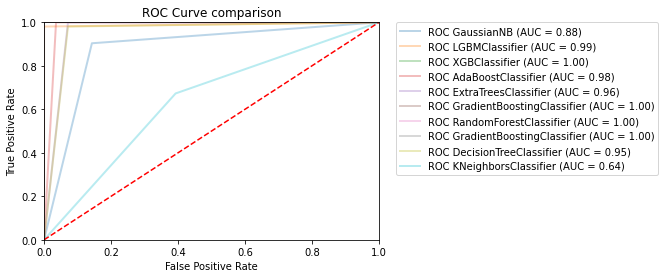

In [ ]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:


    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))

    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()